In [1]:
import pandas as pd

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import statistics as st
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns",None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df1 = pd.read_excel("C:/DS/Credit_Card_Default_Prediction/notebook/data/default of credit card clients.xls")

In [3]:
df1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
# pip install xlrd

In [5]:
df1.columns = df1.iloc[0]

In [6]:
#remove first row from DataFrame
df1 = df1[1:]
#view updated DataFrame
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [8]:
df1 = df1.astype({'LIMIT_BAL':float,'BILL_AMT1':float,'BILL_AMT2':float,'BILL_AMT3':float,'BILL_AMT4':float,'BILL_AMT5':float, 'BILL_AMT6':float,'PAY_AMT1':float,'PAY_AMT2':float,'PAY_AMT3':float,'PAY_AMT4':float,'PAY_AMT5':float,'PAY_AMT6':float})

In [9]:
df1=df1.rename(columns={'default payment next month':"default_payment_next_month"}) #rename of target varaiable

In [10]:
# for i in range(0, len(df1.columns)):
#     df1.iloc[:,i] = pd.to_numeric(df1.iloc[:,i], errors='ignore')
#     # errors='ignore' lets strings remain as 'non-null objects'

In [11]:
df1 = df1.apply(pd.to_numeric, errors='ignore')

In [12]:
df1.dtypes

0
ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default_payment_next_month      int64
dtype: object

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [14]:
# No duplicet value in data set
df1.duplicated().sum()

0

In [15]:
df1.to_csv("clean_default_of_credit_card_clients.csv",index=False)
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object', name=0)

In [16]:
# no null value in data set
df1.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [17]:
df1.shape

(30000, 25)

In [18]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [19]:
df1.columns #check all column names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object', name=0)

In [20]:
# saprate catigorical columns and numerical colums
catigorical_features = df1.select_dtypes(include="object").columns
numerical_features = df1.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object', name=0)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object', name=0)


In [21]:
df1.describe().T #check statistical measurements

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0


In [22]:
df1.default_payment_next_month.value_counts()

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64


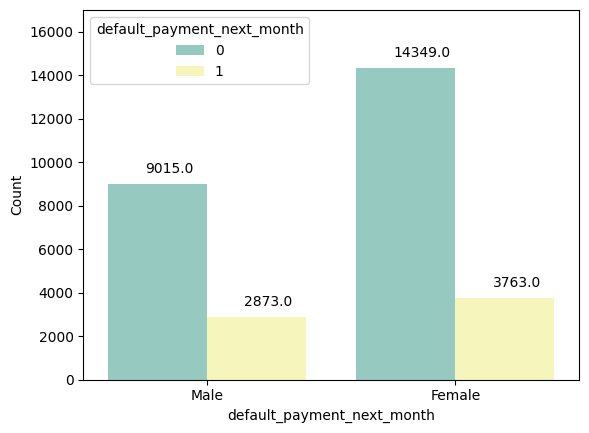

In [23]:
print(df1['default_payment_next_month'].value_counts())
plt.figure(dpi=100)
ax=sns.countplot(data=df1,x="SEX",hue="default_payment_next_month" ,palette="Set3")
plt.xlabel("default_payment_next_month")
plt.ylabel("Count")
plt.ylim(0,17000)
plt.xticks([0,1],['Male','Female'])
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()

In [24]:
df2=df1.copy() #shallow copy

In [25]:
def edu1(x):
    if x==1:
        return "Graduate"
    elif x==2:
        return "University"
    elif x==3:
        return "High school"
    else:
        return "others"
df2['EDUCATION']=df1['EDUCATION'].apply(edu1)

In [26]:
print(df2['EDUCATION'].value_counts())

EDUCATION
University     14030
Graduate       10585
High school     4917
others           468
Name: count, dtype: int64


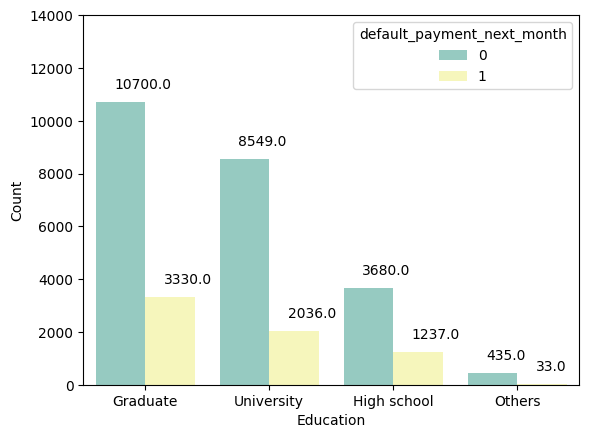

In [27]:
plt.figure(dpi=100)
ax=sns.countplot(data=df2,x='EDUCATION',hue="default_payment_next_month",palette="Set3")
plt.xlabel("Education")
plt.ylabel("Count")
plt.ylim(0,14000)
plt.xticks([0,1,2,3],['Graduate','University','High school','Others'])
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()

In [28]:
df1['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [29]:
def mar(x):
    if x==1:
        return "Married"
    elif x==2:
        return "Single"
    else:
        return "Other"
df2['MARRIAGE']=df1['MARRIAGE'].apply(mar)

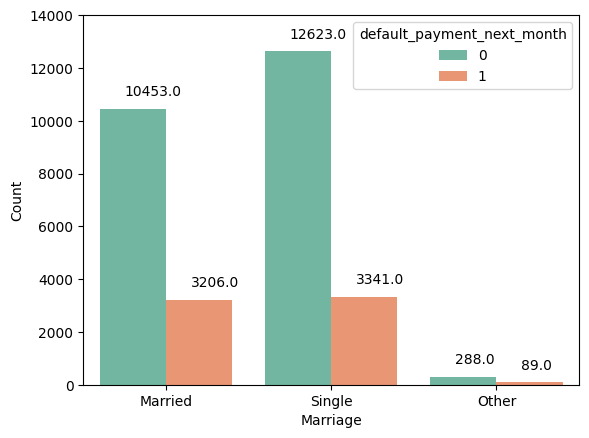

In [30]:
plt.figure(dpi=100)
ax=sns.countplot(data=df2,x='MARRIAGE',hue='default_payment_next_month',palette="Set2")
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.ylim(0,14000)
plt.xticks([0,1,2],['Married','Single','Other'])
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()

In [31]:
bins=[20,30,40,50,60,70,80]
ages=['21-30','31-40','41=50','51-60','61-70','71-80']
df1['Age_rang']=pd.cut(x=df1.AGE,bins=bins,labels=ages, right=True)

In [32]:
df1['Age_rang'].value_counts()

Age_rang
21-30    11013
31-40    10713
41=50     6005
51-60     1997
61-70      257
71-80       15
Name: count, dtype: int64

In [33]:
age_no_default=df1.Age_rang[df1["default_payment_next_month"]==0].value_counts()
age_default=df1.Age_rang[df1['default_payment_next_month']==1].value_counts()
print(age_default)
print(age_no_default)

Age_rang
21-30    2471
31-40    2189
41=50    1399
51-60     504
61-70      68
71-80       5
Name: count, dtype: int64
Age_rang
21-30    8542
31-40    8524
41=50    4606
51-60    1493
61-70     189
71-80      10
Name: count, dtype: int64


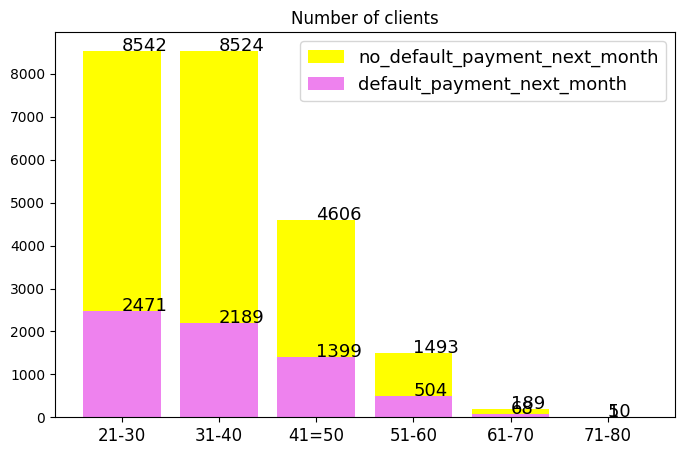

In [34]:
plt.subplots(figsize=(8,5))
plt.bar(age_no_default.index,age_no_default.values,label="no_default_payment_next_month",color='yellow')
plt.bar(age_default.index,age_default.values,label="default_payment_next_month",color="violet")
for x,y in zip(ages,age_no_default):
    plt.text(x,y,y,fontsize=13)
for x,y in zip(ages,age_default):
    plt.text(x,y,y,fontsize=13)
    
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Number of clients",fontsize=12)
plt.legend(loc='upper right',fontsize=13)
plt.show()

In [35]:
def limit(x):
    if x<100000:
        return "less than 100K"
    elif x in range(100000,200000):
        return "100K"
    elif x in range(200000,300000):
        return "200K"
    elif x in range(300000,400000):
        return "300K"
    elif x in range(400000,500000):
        return "400K"
    elif x in range(500000,600000):
        return "500K"
    elif x in range(600000,700000):
        return "600K"
    elif x in range(700000,800000):
        return "700K"
    elif x in range(800000,900000):
        return "800K"
    elif x in range(900000,1000000):
        return "900K"
    else:
        return "greater than 1M"

In [36]:
df2['LIMIT_BAL']=df2['LIMIT_BAL'].apply(lambda x: limit(x))

<Axes: xlabel='LIMIT_BAL', ylabel='count'>

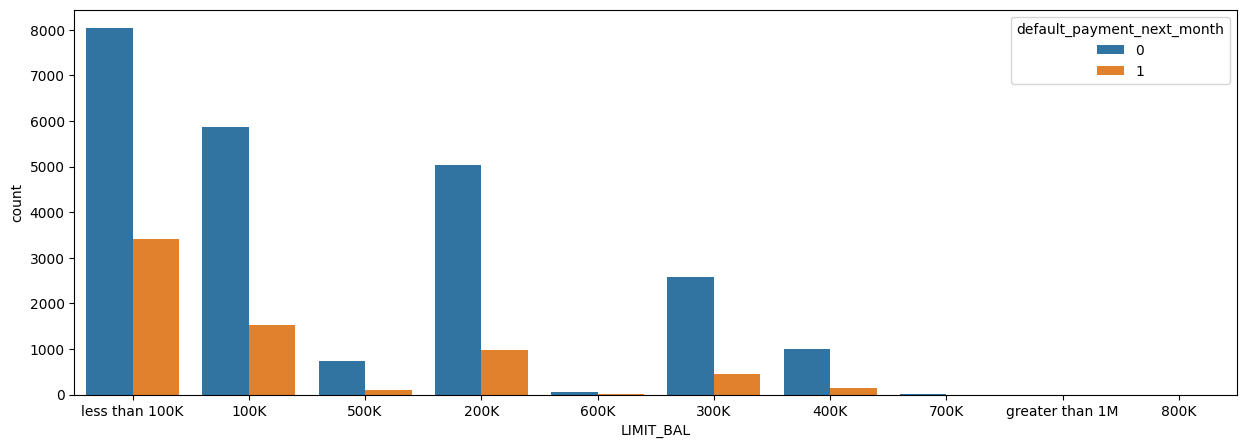

In [37]:
plt.figure(figsize=[15,5])
sns.countplot(data=df2,x='LIMIT_BAL',hue='default_payment_next_month')

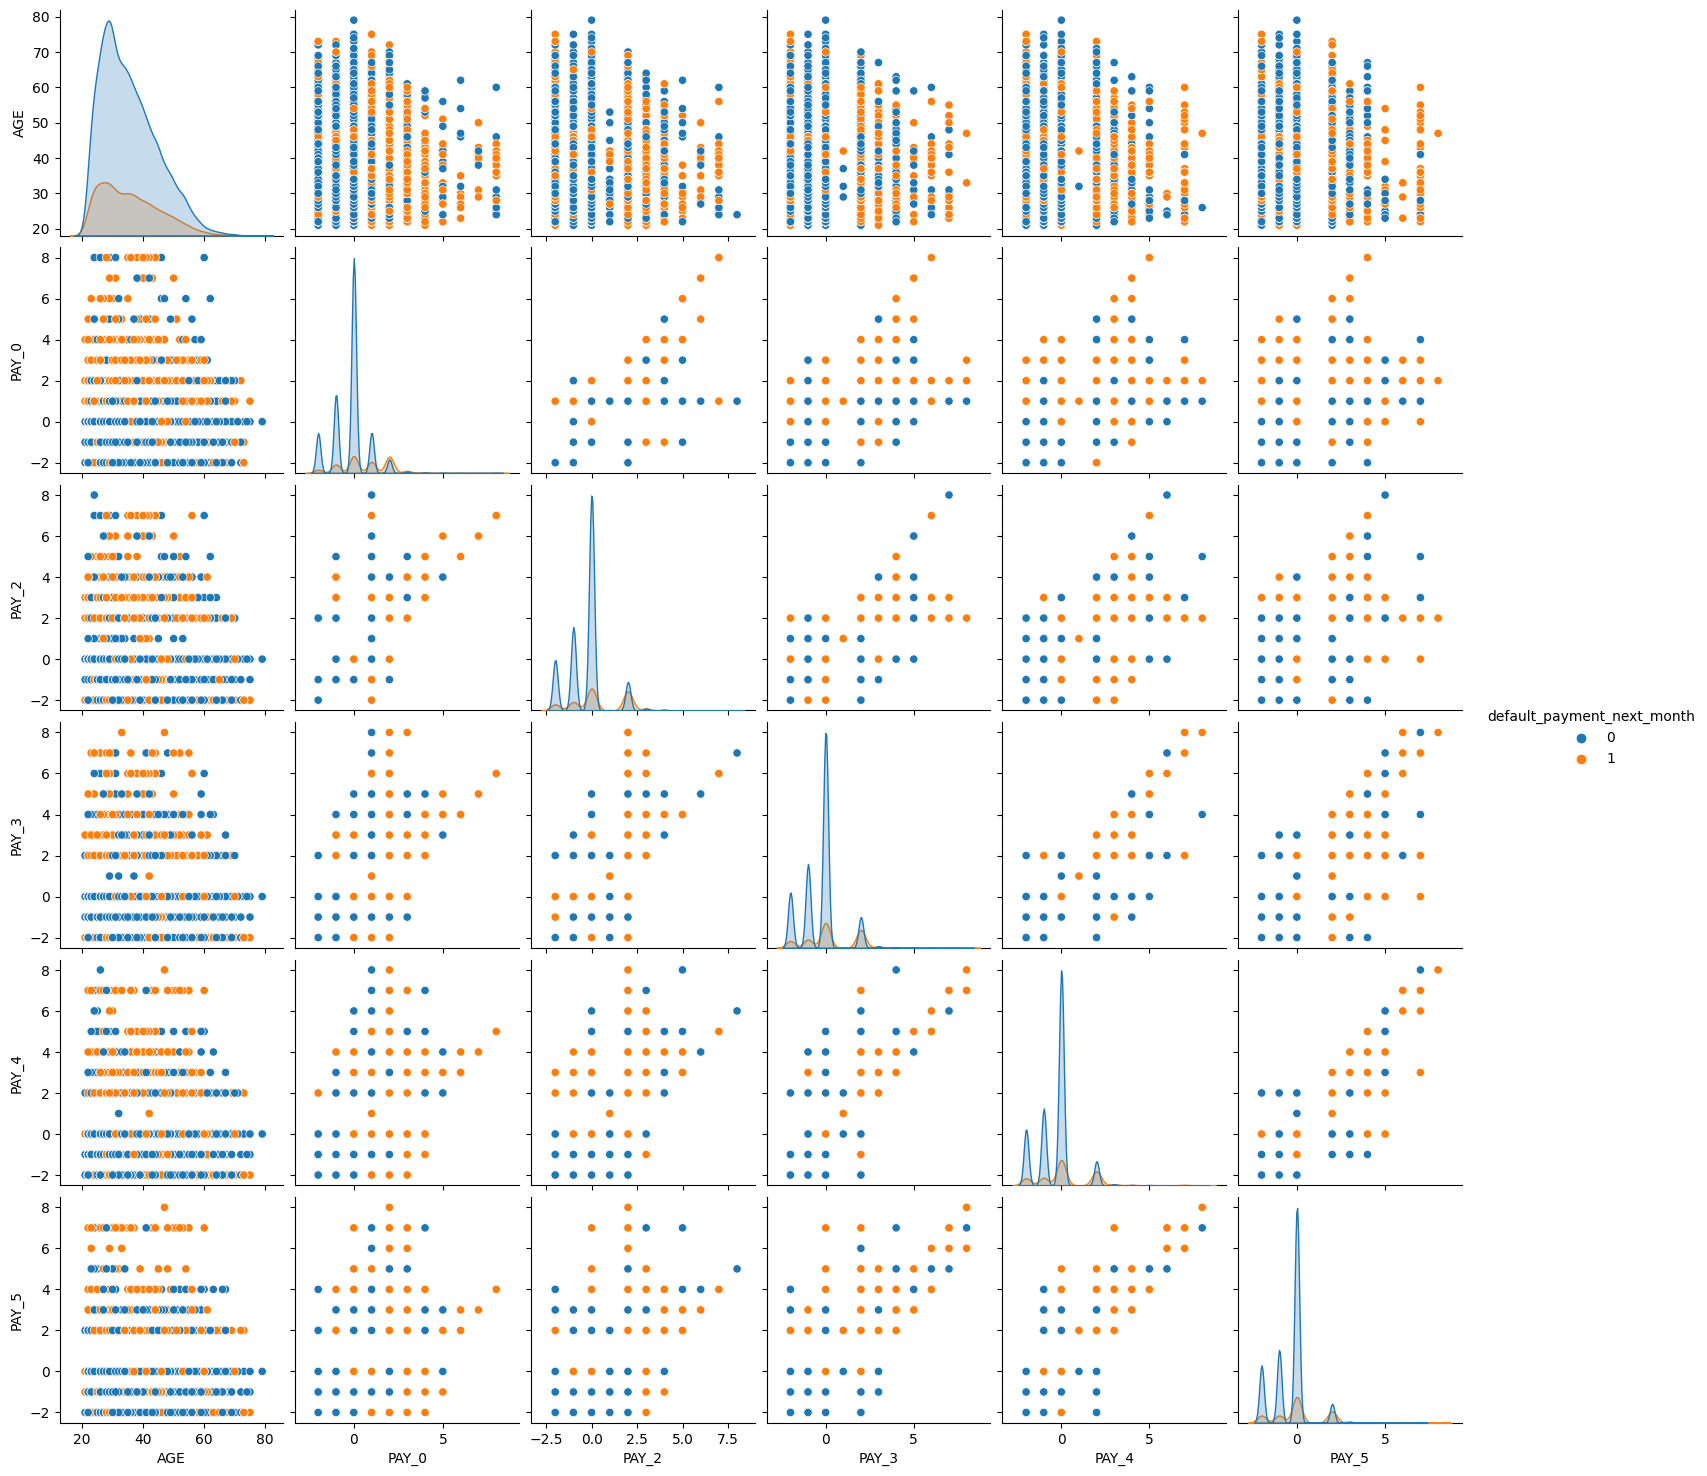

In [38]:
sns.pairplot(df1, vars=df1.columns[5:11], kind='scatter',hue= 'default_payment_next_month')

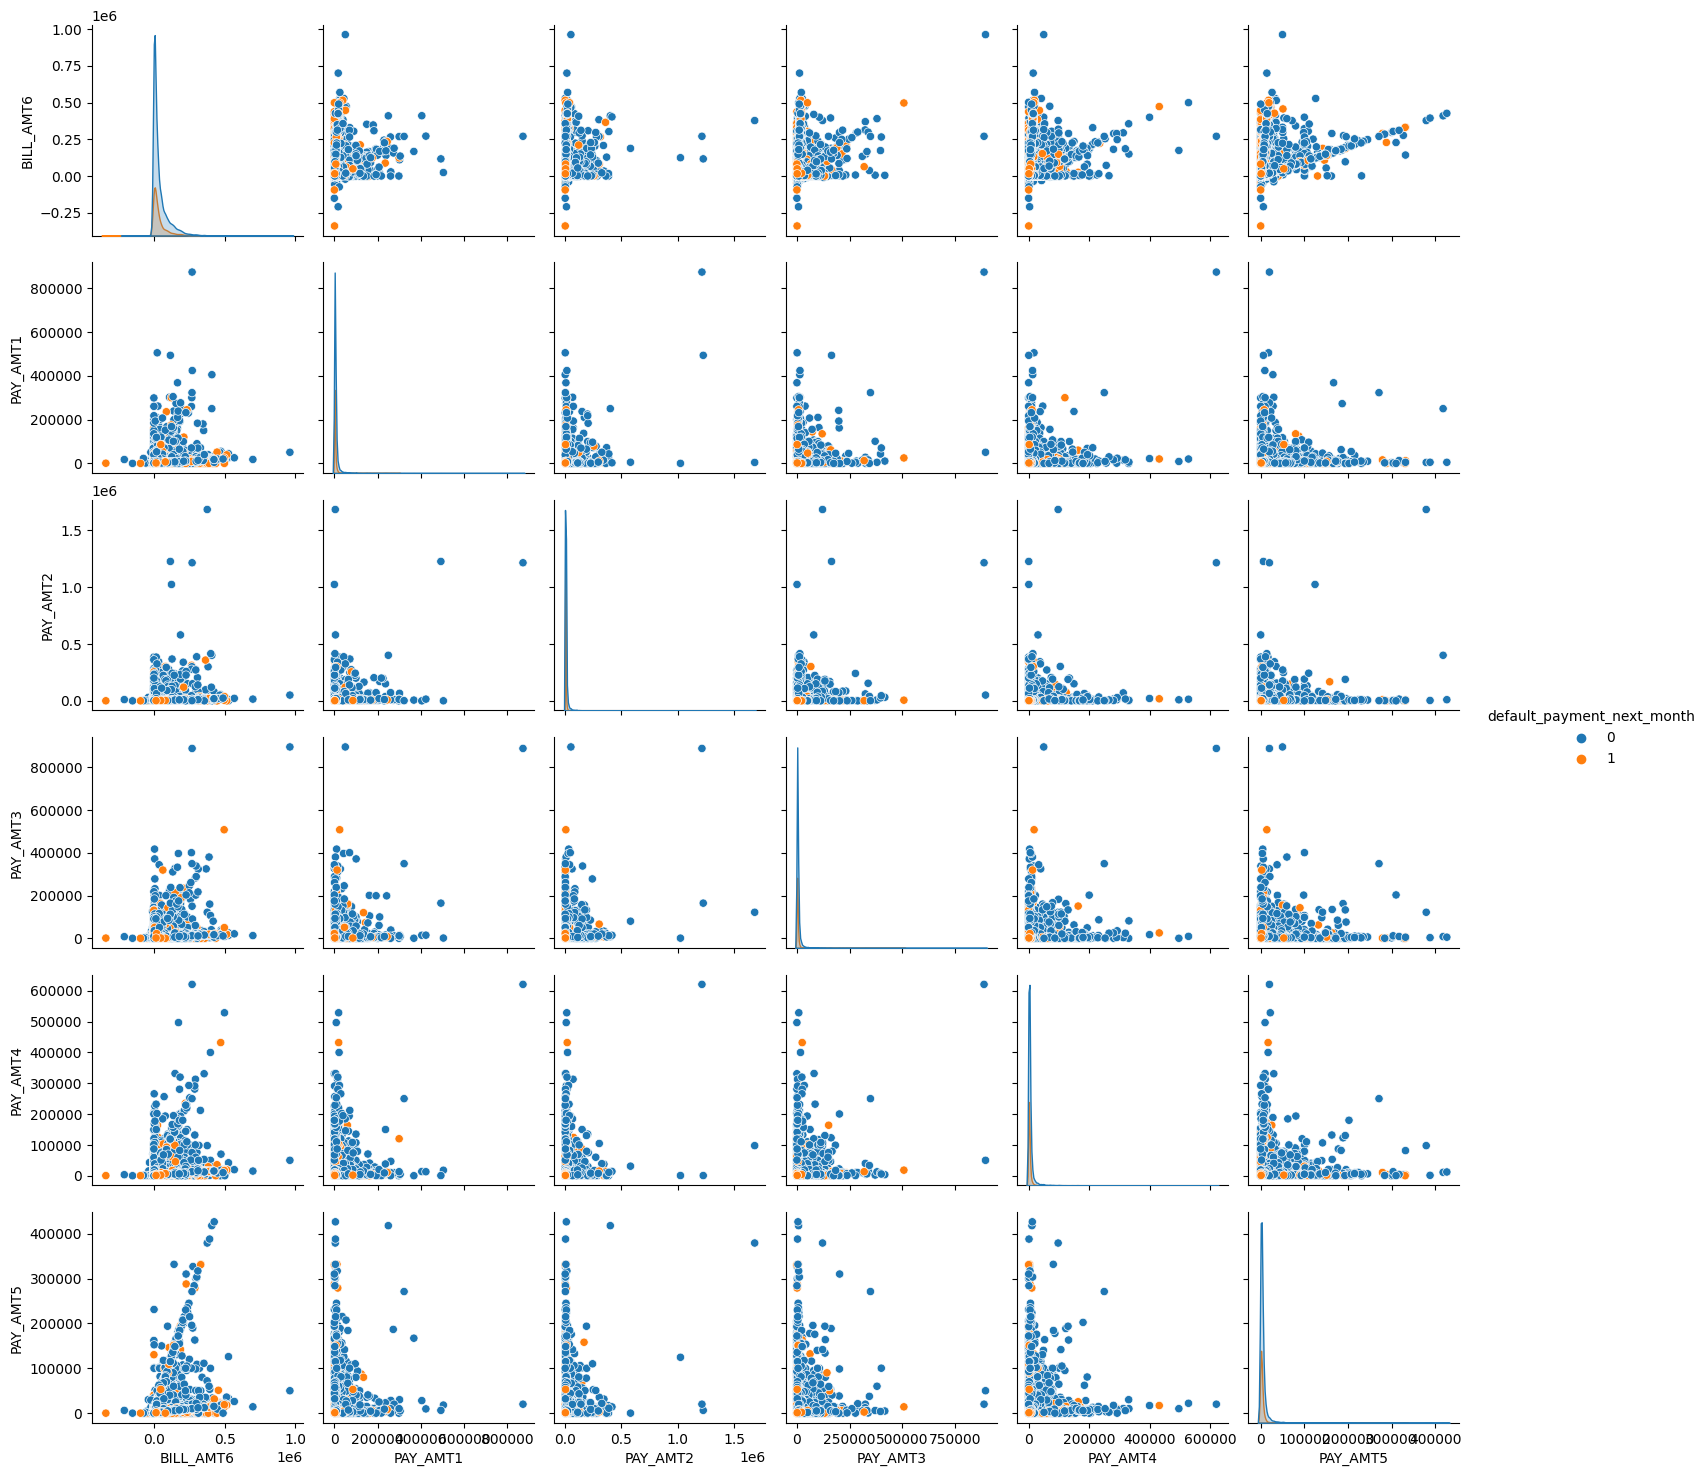

In [40]:
sns.pairplot(df1, vars=df1.columns[17:23], kind='scatter',hue= 'default_payment_next_month')

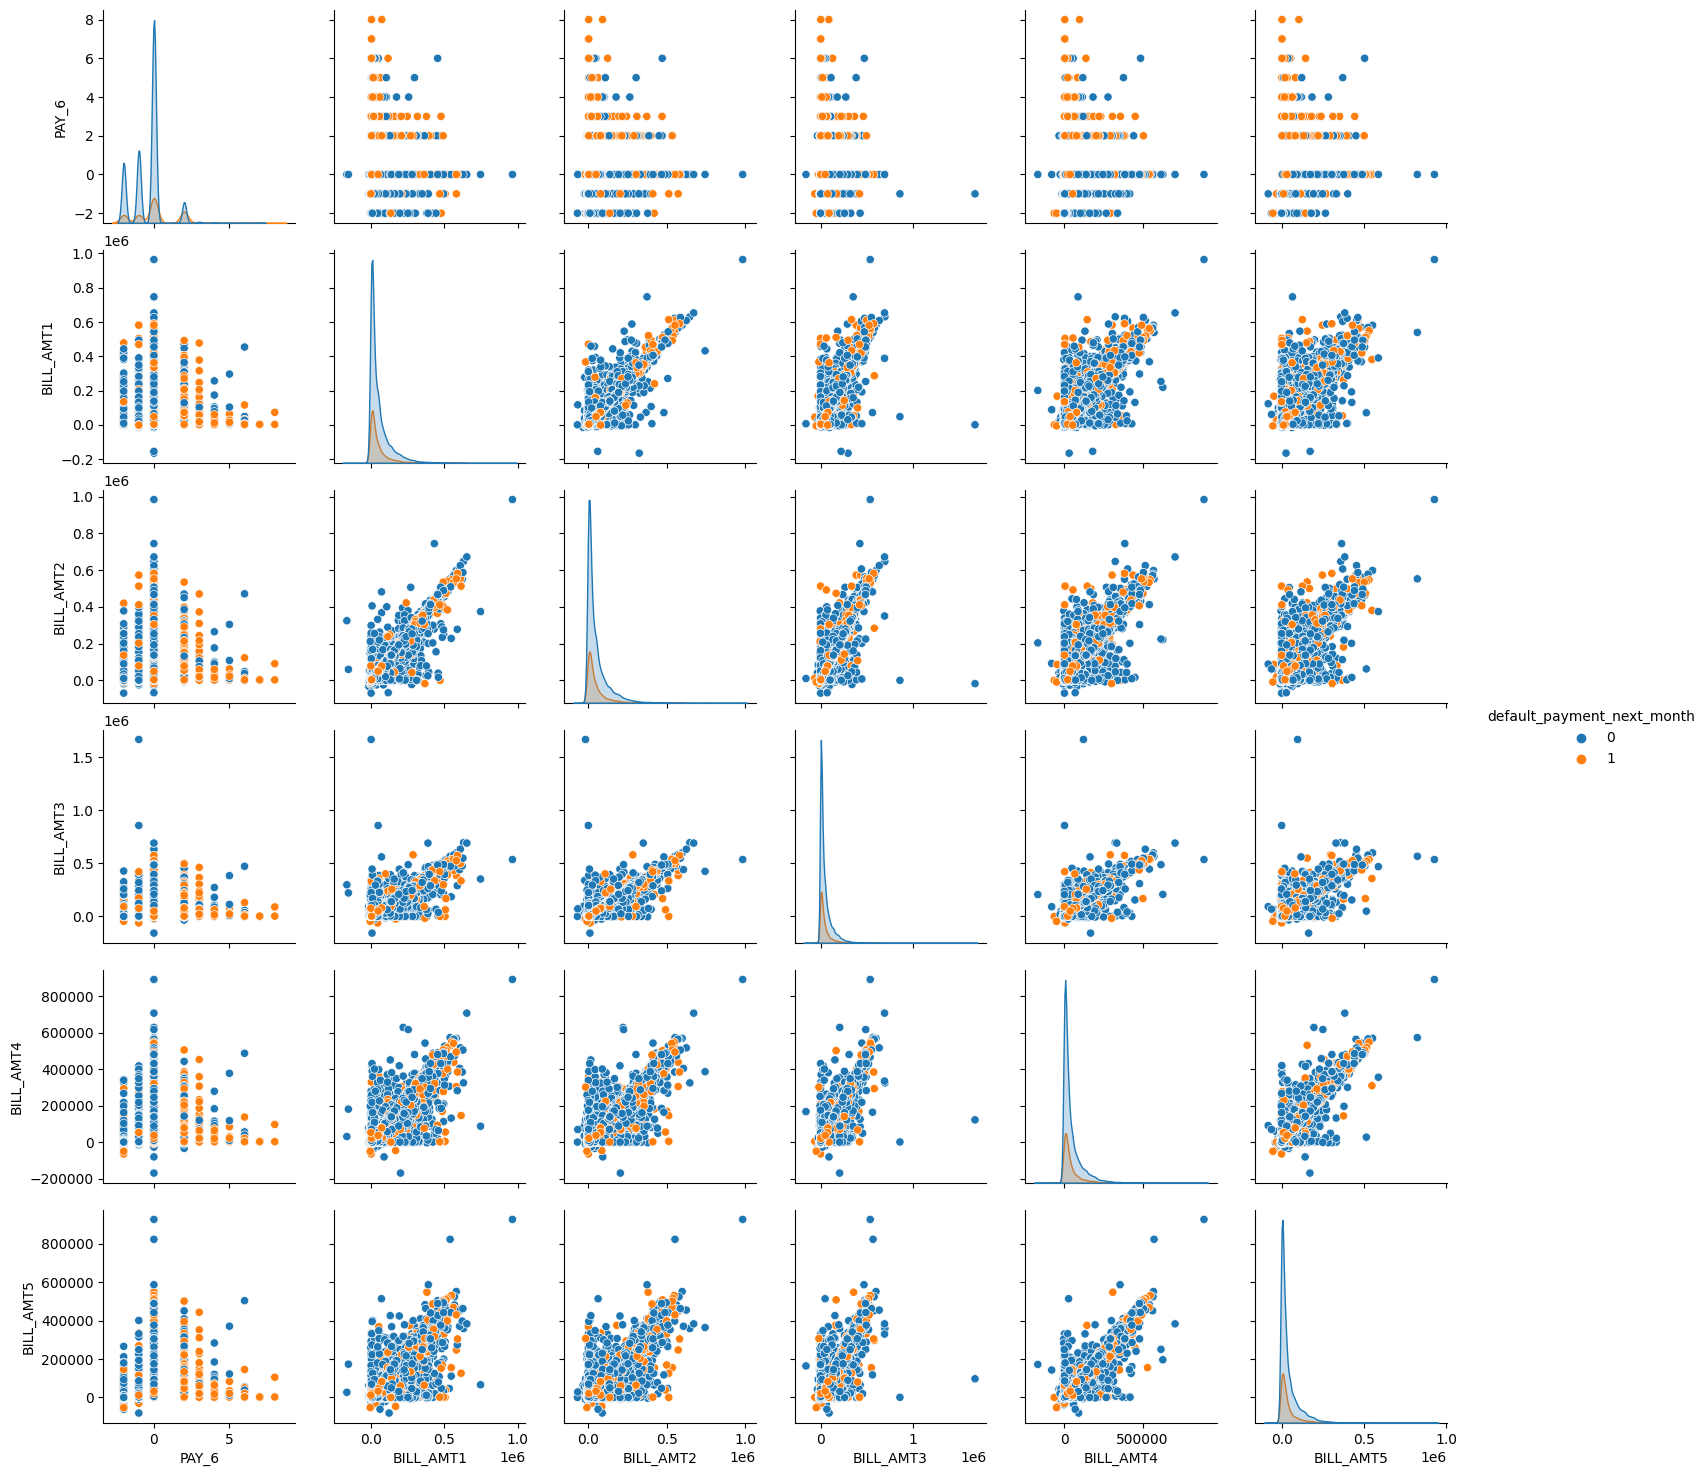

In [41]:
sns.pairplot(df1, vars=df1.columns[11:17], kind='scatter',hue= 'default_payment_next_month')

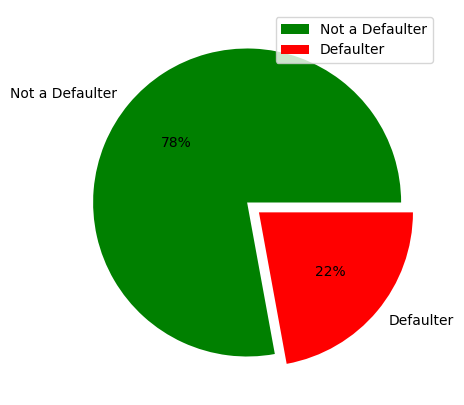

In [46]:
plt.figure(figsize = (7,5))
palette_color = sns.color_palette('rocket',as_cmap=True)
keys=['Not a Defaulter','Defaulter']
plt.pie(df1["default_payment_next_month"].value_counts(), labels=keys, autopct='%.0f%%',colors = ["green", "red"],explode = [0,0.1])
plt.legend()
plt.show()

<Axes: xlabel='0', ylabel='0'>

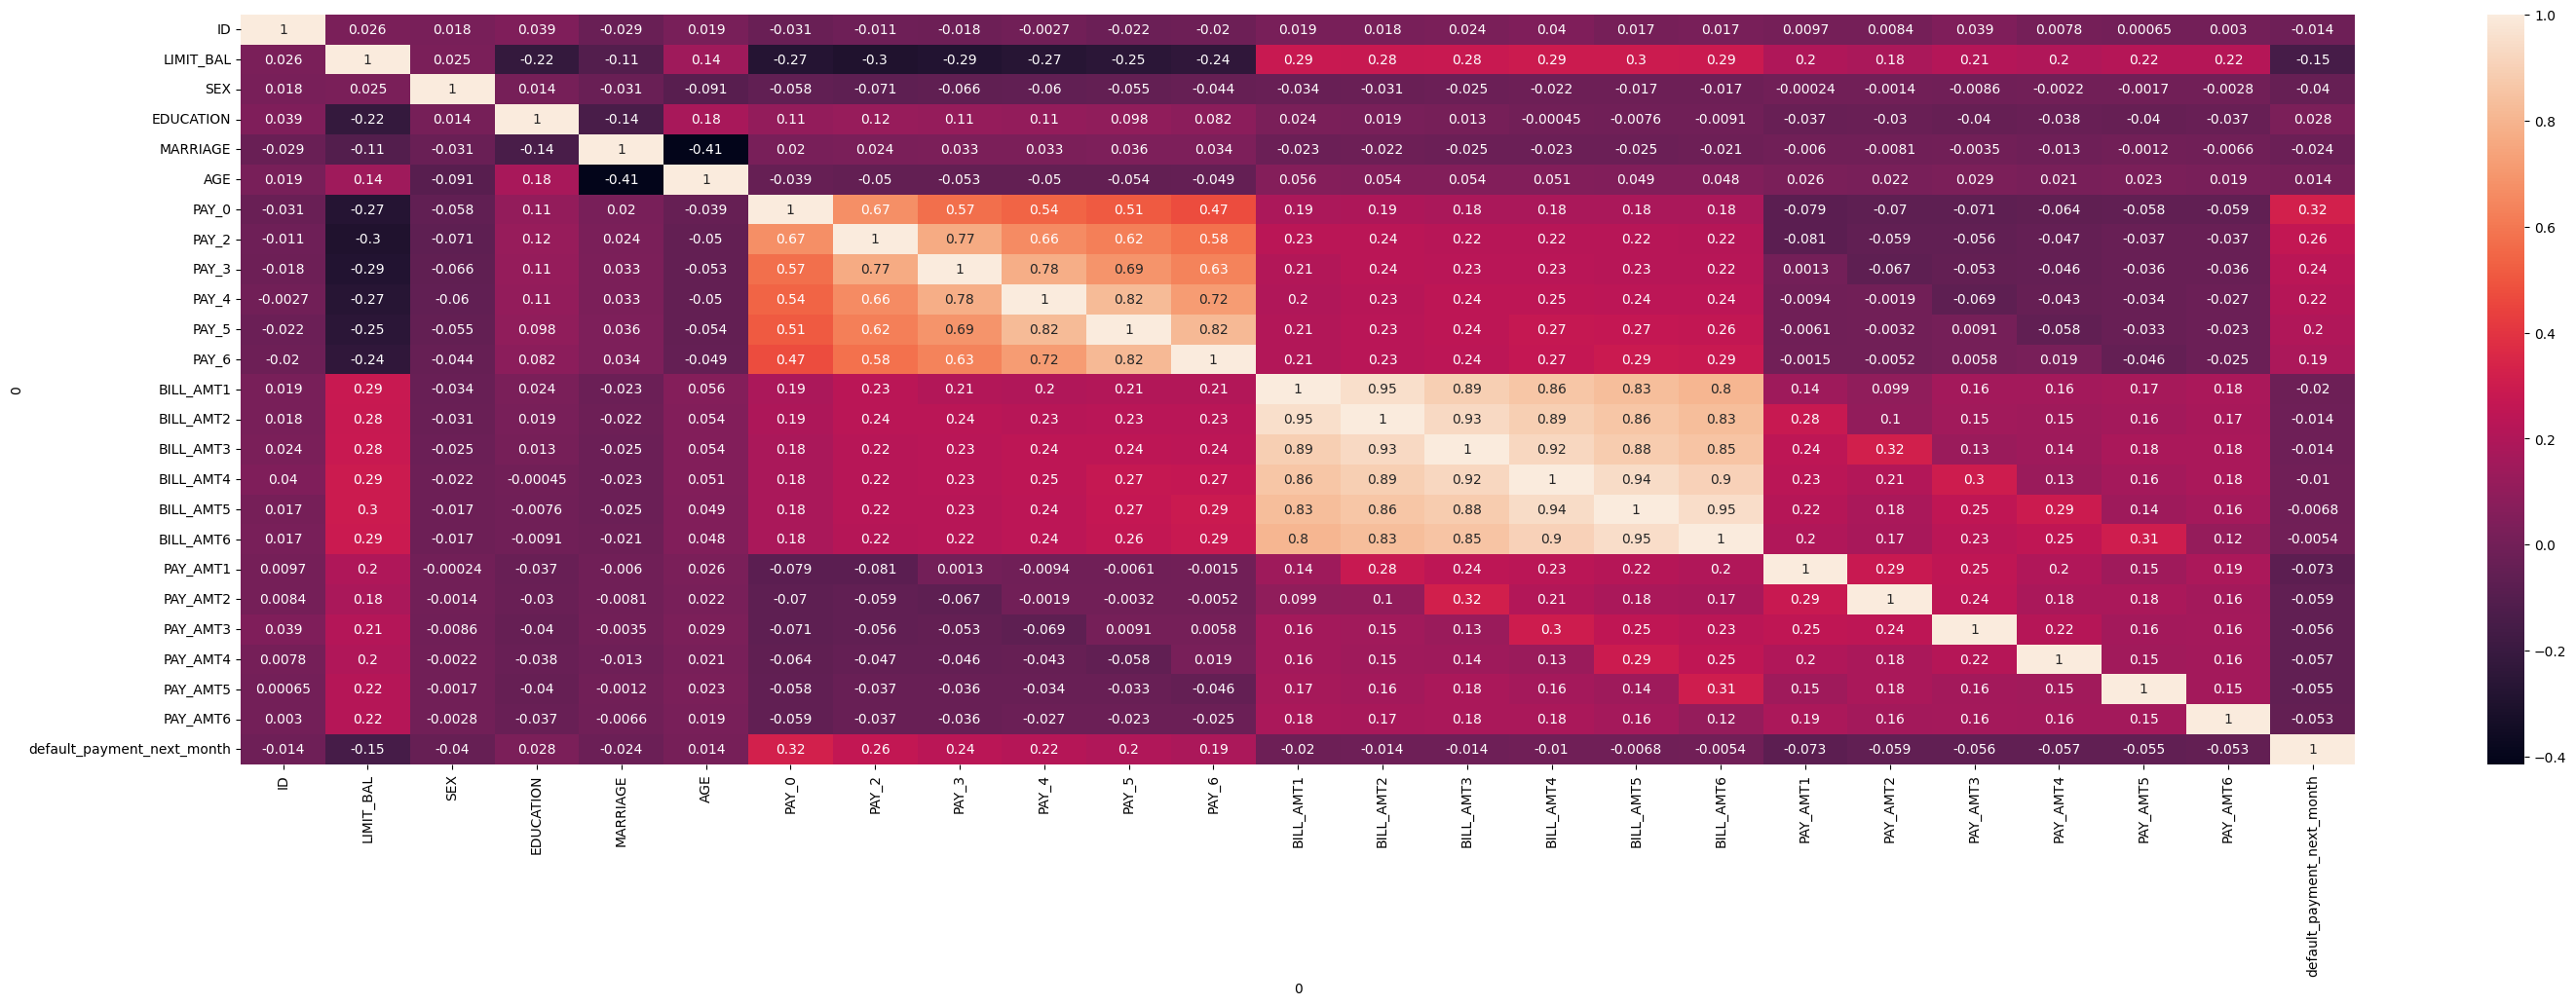

In [48]:
plt.figure(figsize=(35,10))
sns.heatmap(df1.corr(numeric_only=True),annot=True)

In [49]:
df=df1.copy()